1. The process of downloading major stock indices data provided by Yahoo Finance and processing as Dataframe
    - Continue from "01_04 yahoo_finance stock_indices download multi ticker.ipynb"
    - Calculate log returns and return correlations 
    - Download multi historical price data from yahoo finance
        - Input : Historical price DataFrame
        - Output: Log return Heatmap, Return correlations Heatmap

In [9]:
# Loading Python Packages to use 
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt                

# use the code from "01_03 yahoo_finance stock_indices download multi ticker.ipynb"

major_indices = pd.DataFrame(pd.read_html("https://finance.yahoo.com/world-indices")[0])

# Slicing columns
i = 5                                       # set column counter variable, change i to slicing columns
major_indices1 = major_indices.iloc[:, :i]  # create another dataframe 'major_indices1'
major_indices1
drop_row_index_list = [3,4,5,7,11,12,13,14,20,25,28,31,32,33,34,35]  

major_indices2 = major_indices.drop(drop_row_index_list,axis=0)       
major_indices1_2 = major_indices1.drop(drop_row_index_list,axis=0) #Datafrmae to use 

Tks=major_indices1_2['Symbol'].values.tolist()

# Declare historical price variables[symbols('ticker'), date, interval, etc]
# yf.download(ticker, start, end, interval, etc) input varibales:'ticker', 'start=', 'end=', 'interval=' etc
tk = Tks                    # Use ticker list 'Tks' of 'Symbol' from DataFrame 'major_indices1_2' 

s_d = '2007-12-20'          # start date
e_d = '2022-12-30'          # end date, if it is up to today, just drop 'end' parameter
periods = 'ytd'             # Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
interval='1d'               # Valid interval : Daily;'1D', Weekly:'1wk',monthly:'1mo', 3month :'3mo'                        
# Download from start date to end date
df = pd.DataFrame(yf.download(tk,start=s_d,end=e_d,interval=interval)['Adj Close'])


df1=df.reset_index()            # date필드 설정을 위해서 인덱스를 해제

# Get all dates within the sample period (데이터에 없는 날짜 채우기)
start_date = df1['Date'].astype(str).iloc[0] 
end_date = df1['Date'].astype(str).iloc[-1]  
   
date_all = pd.date_range(start_date, end_date, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True) 

# Merge two dataframes and fill NaN value with previous value
df1_all = pd.merge(date_all,df1,how='left')    
df1_all = df1_all.fillna(method='ffill')

# Create year-end price dataframe including last date and chage colume name from ticker to index name
year_end = pd.date_range(start_date, end_date, freq='Y') 
df_y=pd.DataFrame(year_end)                    

df_y.loc[len(df_y)]=df1.iloc[-1,0]           
df_y.columns=['Date']                        

df_y=pd.merge(df_y,df1_all, how='left')    

#Set year as index and change column name

df_y['Year']=df_y['Date'].dt.year          
df_y=df_y.set_index('Year', drop=True)     
df_y=df_y.iloc[:,1:]          
     
col_list=df_y.columns.to_list()       

df_name=pd.DataFrame(col_list)
df_name.columns=['Symbol']
df_name1=pd.merge(df_name, major_indices, how='left')
df_name1=df_name1['Name'].to_list()
df_y.columns=df_name1

# Create month-end price dataframe including last date and chage colume name from ticker to index name
month_end = pd.date_range(s_d, e_d, freq='M') 
df_m=pd.DataFrame(month_end)                                                        
df_m.loc[len(df_m)]=df1.iloc[-1,0]   
df_m.columns=['Date']                
df_m=pd.merge(df_m,df1_all, how='left')    

df_m['Year']=df_m['Date'].dt.year
df_m['Month']=df_m['Date'].dt.month         

#Set month as index and change column name

df_mm=df_m.set_index(['Year','Month'], drop=True)     
df_mm=df_mm.iloc[:,1:]                                
     
col_list_m=df_mm.columns.to_list()        

df_name_m=pd.DataFrame(col_list_m)
df_name_m.columns=['Symbol']
df_name1_m=pd.merge(df_name_m, major_indices, how='left')
df_name1_m=df_name1_m['Name'].to_list()
df_mm.columns=df_name1_m
df_mm


[*********************100%***********************]  20 of 20 completed


SSE Composite Index  Shenzhen Index  ALL ORDINARIES  \
Year Month                                                        
2007 12             5261.562988    17700.419922     6421.000000   
2008 1              4383.393066    15857.532227     5697.000000   
     2              4348.542969    15823.702148     5674.700195   
     3              3472.712891    13301.990234     5409.700195   
     4              3693.105957    13504.738281     5657.000000   
...                         ...             ...             ...   
2022 8              3202.139893    11815.790039     7226.100098   
     9              3024.389893    10778.610352     6678.700195   
     10             2893.479980    10397.040039     7054.799805   
     11             3151.340088    11108.500000     7480.700195   
     12             3073.699951    10996.410156     7197.299805   

            S&P BSE SENSEX  IBOVESPA        Dow 30       CAC 40     FTSE 100  \
Year Month                                                                     
2007 12       20286.990234   63886.0  13264.820312  5614.080078  6456.899902   
2008 1        17648.710938   59490.0  12650.360352  4869.790039  5879.799805   
     2        17578.720703   63489.0  12266.389648  4790.660156  5884.299805   
     3        15644.440430   60968.0  12262.889648  4707.069824  5702.100098   
     4        17287.310547   67868.0  12820.129883  4996.540039  6087.299805   
...                    ...       ...           ...          ...          ...   
2022 8        59537.070312  109523.0  31510.429688  6125.100098  7284.200195   
     9        57426.921875  110037.0  28725.509766  5762.339844  6893.799805   
     10       60746.589844  116037.0  32732.949219  6266.770020  7094.500000   
     11       63099.648438  112486.0  34589.769531  6738.549805  7573.100098   
     12       61133.878906  110031.0  33220.800781  6573.470215  7512.700195   

            DAX PERFORMANCE-INDEX      S&P 500  HANG SENG INDEX        Nasdaq  \
Year Month                                                                      
2007 12               8067.319824  1468.359985     27812.650391   2652.280029   
2008 1                6851.750000  1378.550049     23455.740234   2389.860107   
     2                6748.129883  1330.630005     24331.669922   2271.479980   
     3                6534.970215  1322.699951     22849.199219   2279.100098   
     4                6948.819824  1385.589966     25755.349609   2412.800049   
...                           ...          ...              ...           ...   
2022 8               12834.959961  3955.000000     19954.390625  11816.200195   
     9               12114.360352  3585.620117     17222.830078  10575.620117   
     10              13253.740234  3871.979980     14687.019531  10988.150391   
     11              14397.040039  4080.110107     18597.230469  11468.000000   
     12              14071.719727  3849.280029     19741.140625  10478.089844   

            Jakarta Composite Index  FTSE Bursa Malaysia KLCI  \
Year Month                                                      
2007 12                 2745.825928               1445.030029   
2008 1                  2627.250977               1393.250000   
     2                  2721.944092               1357.400024   
     3                  2447.299072               1247.520020   
     4                  2304.516113               1279.859985   
...                             ...                       ...   
2022 8                  7178.589844               1512.050049   
     9                  7040.797852               1394.630005   
     10                 7098.890137               1460.380005   
     11                 7081.312988               1488.800049   
     12                 6860.077148               1491.630005   

            KOSPI Composite Index    IPC MEXICO    Nikkei 225  Russell 2000  \
Year Month                                                                    
2007 12               1897.130005  29536.

In [10]:
df_y

,SSE Composite Index,Shenzhen Index,ALL ORDINARIES,S&P BSE SENSEX,IBOVESPA,Dow 30,CAC 40,FTSE 100,DAX PERFORMANCE-INDEX,S&P 500,HANG SENG INDEX,Nasdaq,Jakarta Composite Index,FTSE Bursa Malaysia KLCI,KOSPI Composite Index,IPC MEXICO,Nikkei 225,Russell 2000,STI Index,TSEC weighted index
Year,,,,,,,,,,,,,,,,,,,,
2007,5261.562988,17700.419922,6421.000000,20286.990234,63886.0,13264.820312,5614.080078,6456.899902,8067.319824,1468.359985,27812.650391,2652.280029,2745.825928,1445.030029,1897.130005,29536.830078,15307.780273,766.030029,3482.300049,8506.248047
2008,1820.805054,6485.437012,3659.300049,9647.309570,37550.0,8776.389648,3217.969971,4434.200195,4810.200195,903.250000,14387.480469,1577.030029,1355.407959,876.750000,1124.469971,22380.320312,8859.559570,499.450012,1761.560059,4591.203125
2009,3277.138916,13699.816406,4882.700195,17464.810547,68588.0,10428.049805,3936.330078,5412.899902,5957.430176,1115.099976,21872.500000,2269.149902,2534.355957,1272.780029,1682.770020,32120.470703,10546.440430,625.390015,2879.760010,8188.079102
2010,2808.076904,12458.410156,4846.899902,20509.089844,69305.0,11577.509766,3850.760010,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,3703.511963,1518.910034,2051.000000,38243.140625,10228.919922,783.650024,3190.040039,8972.466797
2011,2199.416992,8918.720703,4111.000000,15454.919922,56754.0,12217.559570,3159.810059,5572.299805,5898.350098,1257.599976,18434.390625,2605.149902,3821.991943,1530.729980,1825.739990,37077.519531,8455.349609,740.919983,2646.350098,7072.054199
2012,2269.127930,9116.377930,4664.600098,19426.710938,60952.0,13104.139648,3620.250000,5897.799805,7612.390137,1426.189941,22656.919922,3019.510010,4316.687012,1688.949951,1997.050049,43705.828125,10395.179688,849.349976,3167.080078,7699.471191
2013,2115.978027,8121.699219,5353.100098,21170.679688,51507.0,16576.660156,4295.950195,6749.100098,9552.160156,1848.359985,23306.390625,4176.589844,4274.176758,1866.959961,2011.339966,42958.820312,16291.309570,1163.640015,3167.429932,8611.477539
2014,3234.677002,11014.497070,5388.600098,27499.419922,50007.0,17823.070312,4272.750000,6566.100098,9805.549805,2058.899902,23605.039062,4736.049805,5226.946777,1761.250000,1915.589966,43145.660156,17450.769531,1204.699951,3365.149902,9307.225586
2015,3539.181885,12664.748047,5344.600098,26117.539062,43350.0,17425.029297,4677.140137,6242.299805,10743.009766,2043.939941,21914.400391,5007.410156,4593.007812,1692.510010,1961.310059,42977.500000,19033.710938,1135.890015,2882.729980,8338.027344


2 Calculate yealy log returns and monthly log returns
    - refer the return calculation section

In [11]:
#2.1 yearly log returns
df_y_logR=np.log(df_y).diff(1)
df_y_logR

,SSE Composite Index,Shenzhen Index,ALL ORDINARIES,S&P BSE SENSEX,IBOVESPA,Dow 30,CAC 40,FTSE 100,DAX PERFORMANCE-INDEX,S&P 500,HANG SENG INDEX,Nasdaq,Jakarta Composite Index,FTSE Bursa Malaysia KLCI,KOSPI Composite Index,IPC MEXICO,Nikkei 225,Russell 2000,STI Index,TSEC weighted index
Year,,,,,,,,,,,,,,,,,,,,
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,-1.061149,-1.004029,-0.562302,-0.743301,-0.531427,-0.413050,-0.556527,-0.375802,-0.517083,-0.485902,-0.659133,-0.519876,-0.705979,-0.499663,-0.523030,-0.277456,-0.546864,-0.427714,-0.681493,-0.616659
2009,0.587692,0.747823,0.288426,0.593509,0.602444,0.172434,0.201498,0.199438,0.213901,0.210700,0.418872,0.363862,0.625837,0.372737,0.403129,0.361312,0.174291,0.224868,0.491507,0.578537
2010,-0.154471,-0.094987,-0.007359,0.160680,0.010399,0.104565,-0.021978,0.086150,0.148937,0.120293,0.051804,0.156237,0.379342,0.176789,0.197886,0.174471,-0.030569,0.225587,0.102327,0.091481
2011,-0.244308,-0.334243,-0.164673,-0.282941,-0.199791,0.053810,-0.197759,-0.057128,-0.158903,-0.000032,-0.222816,-0.018152,0.031490,0.007752,-0.116342,-0.030953,-0.190420,-0.056070,-0.186852,-0.238010
2012,0.031203,0.021920,0.126336,0.228722,0.071361,0.070054,0.136031,0.056772,0.255105,0.125801,0.206247,0.147604,0.121716,0.098362,0.089686,0.164471,0.206543,0.136579,0.179629,0.085001
2013,-0.069878,-0.115533,0.137674,0.085968,-0.168369,0.235068,0.171130,0.134830,0.226990,0.259292,0.028262,0.324401,-0.009897,0.100204,0.007130,-0.017239,0.449290,0.314837,0.000110,0.111944
2014,0.424412,0.304673,0.006610,0.261548,-0.029555,0.072498,-0.005415,-0.027489,0.026181,0.107873,0.012733,0.125708,0.201236,-0.058288,-0.048775,0.004340,0.068752,0.034677,0.060552,0.077695
2015,0.089967,0.139610,-0.008199,-0.051558,-0.142856,-0.022586,0.090429,-0.050571,0.091307,-0.007293,-0.074316,0.055715,-0.129292,-0.039811,0.023587,-0.003905,0.086828,-0.058814,-0.154735,-0.109964


In [12]:
#2.2 monthly log returns
df_mm_logR=np.log(df_mm).diff(1)
df_mm_logR

SSE Composite Index  Shenzhen Index  ALL ORDINARIES  \
Year Month                                                        
2007 12                     NaN             NaN             NaN   
2008 1                -0.182605       -0.109944       -0.119634   
     2                -0.007982       -0.002136       -0.003922   
     3                -0.224905       -0.173595       -0.047824   
     4                 0.061532        0.015127        0.044700   
...                         ...             ...             ...   
2022 8                -0.015832       -0.037469        0.007264   
     9                -0.057110       -0.091873       -0.078776   
     10               -0.044249       -0.036042        0.054785   
     11                0.085368        0.066189        0.058618   
     12               -0.024946       -0.010142       -0.038620   

            S&P BSE SENSEX  IBOVESPA    Dow 30    CAC 40  FTSE 100  \
Year Month                                                           
2007 12                NaN       NaN       NaN       NaN       NaN   
2008 1           -0.139317 -0.071292 -0.047430 -0.142227 -0.093627   
     2           -0.003974  0.065058 -0.030823 -0.016383  0.000765   
     3           -0.116574 -0.040518 -0.000285 -0.017603 -0.031453   
     4            0.099857  0.107216  0.044439  0.059680  0.065370   
...                    ...       ...       ...       ...       ...   
2022 8            0.033593  0.059805 -0.041485 -0.051452 -0.018930   
     9           -0.036086  0.004682 -0.092533 -0.061051 -0.055085   
     10           0.056198  0.053092  0.130597  0.083917  0.028697   
     11           0.038004 -0.031080  0.055176  0.072584  0.065283   
     12          -0.031649 -0.022067 -0.040382 -0.024803 -0.008008   

            DAX PERFORMANCE-INDEX   S&P 500  HANG SENG INDEX    Nasdaq  \
Year Month                                                               
2007 12                       NaN       NaN              NaN       NaN   
2008 1                  -0.163317 -0.063114        -0.170376 -0.104185   
     2                  -0.015239 -0.035380         0.036664 -0.050803   
     3                  -0.032098 -0.005977        -0.062863  0.003349   
     4                   0.061404  0.046451         0.119726  0.057007   
...                           ...       ...              ...       ...   
2022 8                  -0.049335 -0.043367        -0.010078 -0.047474   
     9                  -0.057781 -0.098049        -0.147213 -0.110920   
     10                  0.089888  0.076835        -0.159272  0.038266   
     11                  0.082743  0.052358         0.236049  0.042743   
     12                 -0.022856 -0.058238         0.059692 -0.090274   

            Jakarta Composite Index  FTSE Bursa Malaysia KLCI  \
Year Month                                                      
2007 12                         NaN                       NaN   
2008 1                    -0.044144                 -0.036491   
     2                     0.035408                 -0.026068   
     3                    -0.106361                 -0.084414   
     4                    -0.060114                  0.025593   
...                             ...                       ...   
2022 8                     0.032200                  0.013195   
     9                    -0.019381                 -0.080837   
     10                    0.008217                  0.046068   
     11                   -0.002479                  0.019274   
     12                   -0.031741                  0.001899   

            KOSPI Composite Index  IPC MEXICO  Nikkei 225  Russell 2000  \
Year Month                                                                
2007 12                       NaN         NaN         NaN           NaN   
2008 1                  -0.155031   -0.025483   -0.118845     -0.071319   
     2                   0.052129    0.004328    0.000776     -0.038762   
     3                  -0.004468    0.066694

In [13]:
# 2.3  monthly log return correlations
df_mm_corr=df_mm_logR.dropna().corr()
df_mm_corr

,SSE Composite Index,Shenzhen Index,ALL ORDINARIES,S&P BSE SENSEX,IBOVESPA,Dow 30,CAC 40,FTSE 100,DAX PERFORMANCE-INDEX,S&P 500,HANG SENG INDEX,Nasdaq,Jakarta Composite Index,FTSE Bursa Malaysia KLCI,KOSPI Composite Index,IPC MEXICO,Nikkei 225,Russell 2000,STI Index,TSEC weighted index
SSE Composite Index,1.000000,0.947236,0.373895,0.412346,0.407753,0.395745,0.350044,0.342526,0.392802,0.405526,0.618951,0.428761,0.397076,0.423742,0.466316,0.275703,0.446210,0.366226,0.502879,0.459207
Shenzhen Index,0.947236,1.000000,0.353828,0.368267,0.368395,0.357192,0.300099,0.301143,0.343540,0.369691,0.568192,0.397917,0.372483,0.373993,0.404253,0.263574,0.369569,0.336615,0.444207,0.444152
ALL ORDINARIES,0.373895,0.353828,1.000000,0.665333,0.618153,0.757930,0.776516,0.773399,0.726497,0.792386,0.551853,0.762014,0.597653,0.564940,0.678200,0.608664,0.649606,0.762459,0.688664,0.649355
S&P BSE SENSEX,0.412346,0.368267,0.665333,1.000000,0.621887,0.628344,0.637833,0.631449,0.656375,0.665324,0.620787,0.642002,0.670758,0.605024,0.660948,0.603213,0.581569,0.631621,0.739671,0.679298
IBOVESPA,0.407753,0.368395,0.618153,0.621887,1.000000,0.587924,0.562331,0.593688,0.546866,0.603333,0.538054,0.549178,0.570516,0.586004,0.608615,0.620527,0.459419,0.563815,0.659378,0.579893
Dow 30,0.395745,0.357192,0.757930,0.628344,0.587924,1.000000,0.821928,0.784953,0.809527,0.965856,0.559651,0.870992,0.548915,0.555985,0.700249,0.687242,0.694229,0.874548,0.698665,0.628083
CAC 40,0.350044,0.300099,0.776516,0.637833,0.562331,0.821928,1.000000,0.860223,0.913275,0.826095,0.566242,0.769991,0.522510,0.558512,0.692727,0.616430,0.708070,0.763967,0.714812,0.642086
FTSE 100,0.342526,0.301143,0.773399,0.631449,0.593688,0.784953,0.860223,1.000000,0.804094,0.788879,0.624247,0.711850,0.589045,0.558418,0.656679,0.626084,0.640313,0.712638,0.714132,0.659415
DAX PERFORMANCE-INDEX,0.392802,0.343540,0.726497,0.656375,0.546866,0.809527,0.913275,0.804094,1.000000,0.816941,0.583767,0.780087,0.545256,0.575147,0.731799,0.614030,0.726407,0.777293,0.717808,0.645345
S&P 500,0.405526,0.369691,0.792386,0.665324,0.603333,0.965856,0.826095,0.788879,0.816941,1.000000,0.600335,0.950729,0.594045,0.574777,0.737416,0.696488,0.718621,0.909790,0.715220,0.699399


3. Seaborn Heatmap for yearly, monthly returns and monthly correlation
    - import graph libraies
    - Transpose returns Dataframe for better heatmap shape
    - Calculate log return mean for yearly return, 12 month log returns sum for monthly return
    - Show Heatmaps   

In [14]:
# 3.1 import libraies
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 3.2 Transpose returns dataframe with drop NaN value
df_y_logRT=df_y_logR.dropna().T
df_y_logRT['Log mean']=df_y_logRT.mean(axis='columns')

df_mm_logRT=df_mm_logR.iloc[-12:,:].T
df_mm_logRT['12month']=df_mm_logRT.sum(axis='columns')


Major Indices Monthly Log Return Heatmap : 


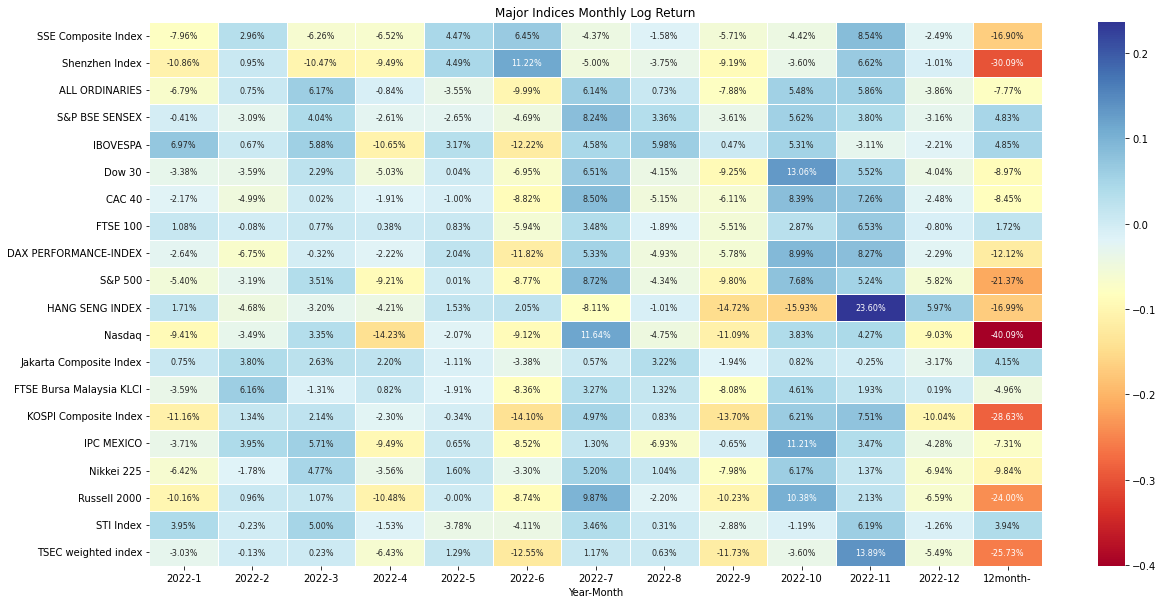

Major Indices Yearly Log Return Heatmap : 


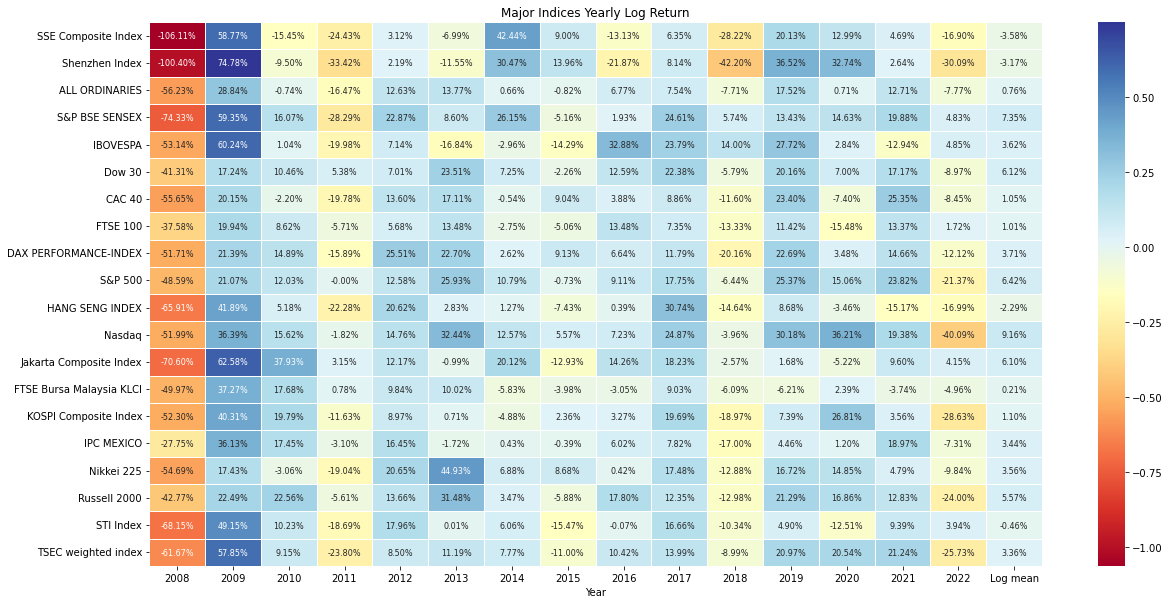

Major Indices Monthly Log Return Correlation Heatmap : 


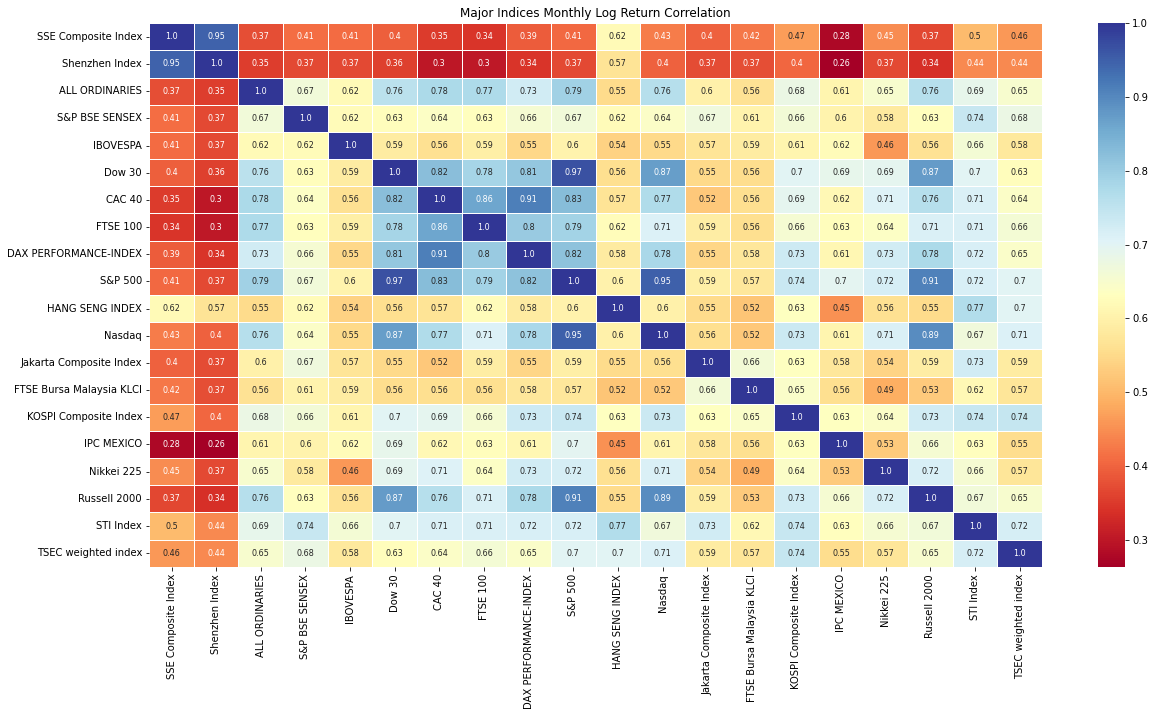

In [16]:
# 3.3 Show Heatmaps 
# Monthly log returns
plt.figure(figsize=(20,10))
plt.title("Major Indices Monthly Log Return")
sns.heatmap(df_mm_logRT,annot=True,cmap='RdYlBu',fmt=".2%",linewidths=.5,annot_kws={"size": 8})
print("Major Indices Monthly Log Return Heatmap : ")
plt.show()

# Yearly log returns
plt.figure(figsize=(20,10))
plt.title("Major Indices Yearly Log Return")
sns.heatmap(df_y_logRT,annot=True,cmap='RdYlBu',fmt=".2%",linewidths=.5,annot_kws={"size": 8})
print("Major Indices Yearly Log Return Heatmap : ")
plt.show()

# Monthly log returns correlation
plt.figure(figsize=(20,10))
plt.title("Major Indices Monthly Log Return Correlation")
sns.heatmap(df_mm_corr,annot=True,cmap='RdYlBu',fmt=".2",linewidths=.5,annot_kws={"size": 8})
print("Major Indices Monthly Log Return Correlation Heatmap : ")
plt.show()
